In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import models, data_reader, utils

%matplotlib inline

image_folder = 'data/images/'
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

scab


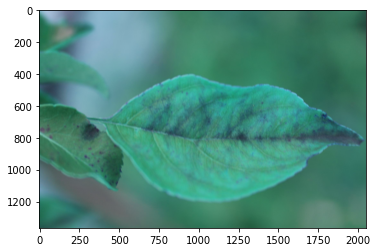

In [2]:
row = train_data.sample(1).iloc[0,:]
for c in row.iteritems():
    if c[1] == 1:
        print(c[0])
img = cv2.imread(f"data/images/{row['image_id']}.jpg")
plt.imshow(img)

In [3]:
train_generator, validation_generator = data_reader.get_generators()
model = models.get_model('inceptionv3')
callbacks = utils.get_callbacks('inceptionv3')

Found 1639 validated image filenames belonging to 4 classes.
Found 182 validated image filenames belonging to 4 classes.


In [4]:
# train the model on the new data for a few epochs
model.fit_generator(generator=train_generator,
                   validation_data=validation_generator,
                   epochs=5,
                   shuffle=True,
                   use_multiprocessing=False,
                   verbose=1,
                   callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 52 steps, validate for 6 steps
Epoch 1/5
52/52 [==============================] - 218s 4s/step - loss: 2.1664 - accuracy: 0.4722 - val_loss: 1.3375 - val_accuracy: 0.4725
Epoch 2/5
52/52 [==============================] - 204s 4s/step - loss: 1.0649 - accuracy: 0.5949 - val_loss: 1.7447 - val_accuracy: 0.4835
Epoch 3/5
52/52 [==============================] - 220s 4s/step - loss: 0.9462 - accuracy: 0.6553 - val_loss: 0.7879 - val_accuracy: 0.7308
Epoch 4/5
52/52 [==============================] - 253s 5s/step - loss: 0.8505 - accuracy: 0.6913 - val_loss: 0.9258 - val_accuracy: 0.6264
Epoch 5/5
52/52 [==============================] - 260s 5s/step - loss: 0.7924 - accuracy: 0.7065 - val_loss: 0.8306 - val_accuracy: 0.6758


In [ ]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit_generator(...)

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800)